In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
import math

In [2]:
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
sns.set()
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
n_tasks = 60000
n_jobs = 6
start = 0
step = round((n_tasks-start)/n_jobs)
for i in range(n_jobs):
    print(f"./build/mcs sched ../task_sched_input.txt task_sched_out_{datetime.date.today()}_{i}.txt {start+i*step} {step}")

./build/mcs sched ../task_sched_input.txt task_sched_out_2022-04-17_0.txt 0 10000
./build/mcs sched ../task_sched_input.txt task_sched_out_2022-04-17_1.txt 10000 10000
./build/mcs sched ../task_sched_input.txt task_sched_out_2022-04-17_2.txt 20000 10000
./build/mcs sched ../task_sched_input.txt task_sched_out_2022-04-17_3.txt 30000 10000
./build/mcs sched ../task_sched_input.txt task_sched_out_2022-04-17_4.txt 40000 10000
./build/mcs sched ../task_sched_input.txt task_sched_out_2022-04-17_5.txt 50000 10000


In [30]:
paths = [
    "../cpp/task_sched_out_2022-04-16_0.txt",
    "../cpp/task_sched_out_2022-04-16_1.txt",
    "../cpp/task_sched_out_2022-04-16_2.txt",
    "../cpp/task_sched_out_2022-04-16_3.txt",
    "../cpp/task_sched_out_2022-04-16_4.txt",
    "../cpp/task_sched_out_2022-04-16_5.txt",
    "../cpp/task_sched_out_2022-04-17_0.txt",
    "../cpp/task_sched_out_2022-04-17_1.txt",
    "../cpp/task_sched_out_2022-04-17_2.txt",
    "../cpp/task_sched_out_2022-04-17_3.txt",
    "../cpp/o_fp_sched_220601_large.txt"
]

df_sched = pd.DataFrame()
for p in paths:
    df_sched = df_sched.append(pd.read_csv(p), ignore_index=True)

In [4]:
df_sched.shape

(120493, 8)

In [5]:
df_sched

,tid,task_type,search_type,scheduler,schedulable,n_visited,duration,depth
0,0,SPO,ACBF,LWLF,1,171353,2903,67
1,0,SPO,ACBF,EDF-VD,1,142082,3104,67
2,1,SPO,ACBF,LWLF,1,111435,3338,89
3,1,SPO,ACBF,EDF-VD,1,100013,2621,89
4,2,SPO,ACBF,LWLF,1,342417,9148,55
...,...,...,...,...,...,...,...,...
488,488,SPO,ACBF,FP,0,2277,23,6
489,489,SPO,ACBF,FP,0,53562,900,11
490,490,SPO,ACBF,FP,0,2516,43,5
491,491,SPO,ACBF,FP,0,280079,4940,27


In [6]:
df_sched["duration_s"] = df_sched["duration"]/1000

In [7]:
df_header = pd.read_csv("../task_sched_header.csv")

In [8]:
df_sched_piv = df_sched.pivot(index="tid", columns="scheduler", values="schedulable")

In [9]:
df = df_header.merge(df_sched_piv, right_on="tid", left_on="ts_id", how="left") # todo

/var/folders/lr/nrx49w_54md3dfrcjb0y_b580000gn/T/ipykernel_51257/1136170292.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sched_u = df.groupby("target_U")['AMCmax', 'EDFVD_test', 'Vestal','EDF-VD', 'LWLF', 'FP'].apply(lambda x: x.sum()/x.notna().sum())


<AxesSubplot:xlabel='target_U'>

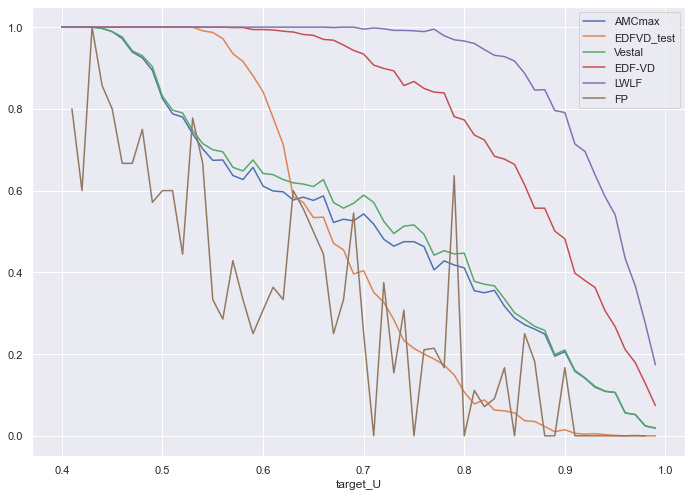

In [10]:
sched_u = df.groupby("target_U")['AMCmax', 'EDFVD_test', 'Vestal','EDF-VD', 'LWLF', 'FP'].apply(lambda x: x.sum()/x.notna().sum())
sched_u.plot()

/var/folders/lr/nrx49w_54md3dfrcjb0y_b580000gn/T/ipykernel_1405/368409500.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("target_U")['AMCmax', 'EDFVD_test', 'Vestal','EDF-VD', 'LWLF'].apply(lambda x: x.notna().sum()).plot()


<AxesSubplot:xlabel='target_U'>

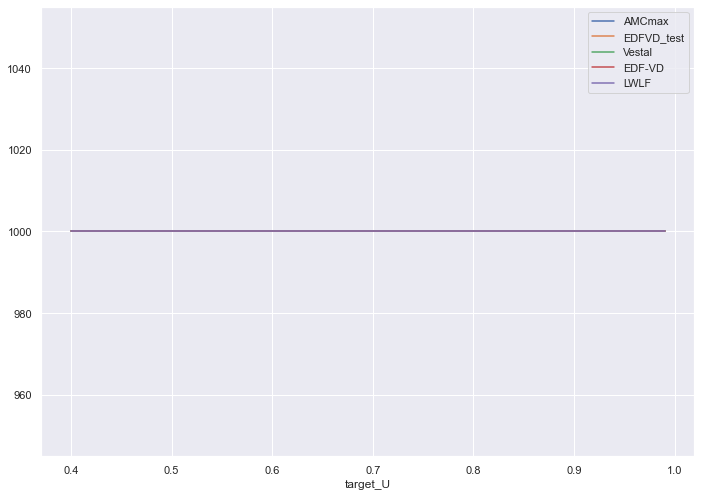

In [29]:
df.groupby("target_U")['AMCmax', 'EDFVD_test', 'Vestal','EDF-VD', 'LWLF'].apply(lambda x: x.notna().sum()).plot()

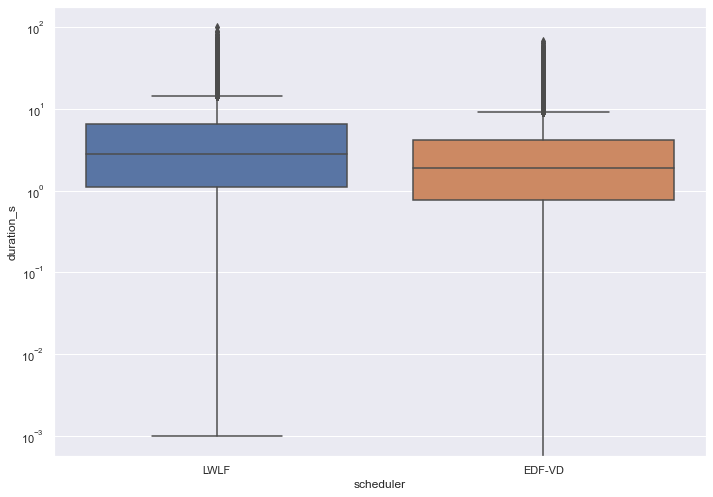

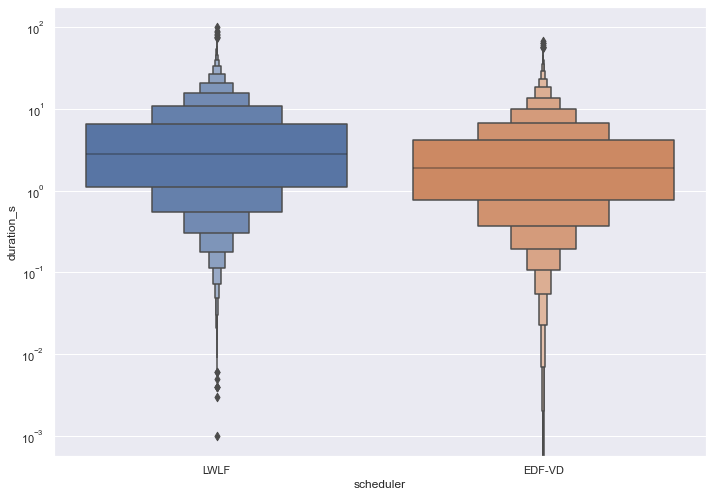

In [30]:
g=sns.boxplot(data=df_sched, x="scheduler", y="duration_s")
g.set_yscale("log")
plt.show()

g=sns.boxenplot(data=df_sched, x="scheduler", y="duration_s")
g.set_yscale("log")
plt.show()

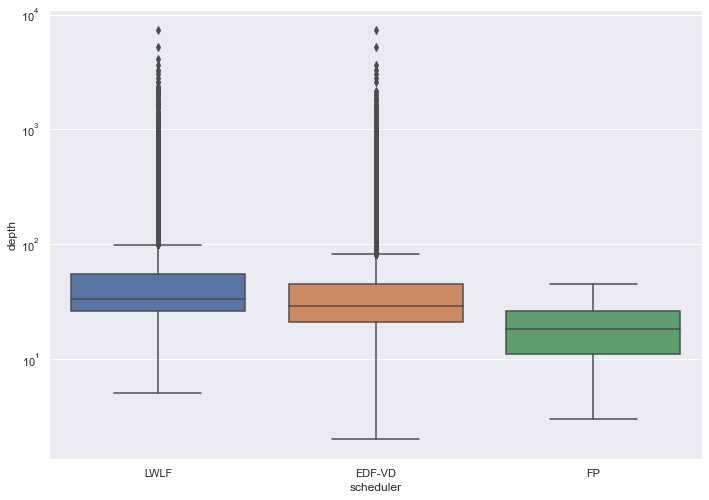

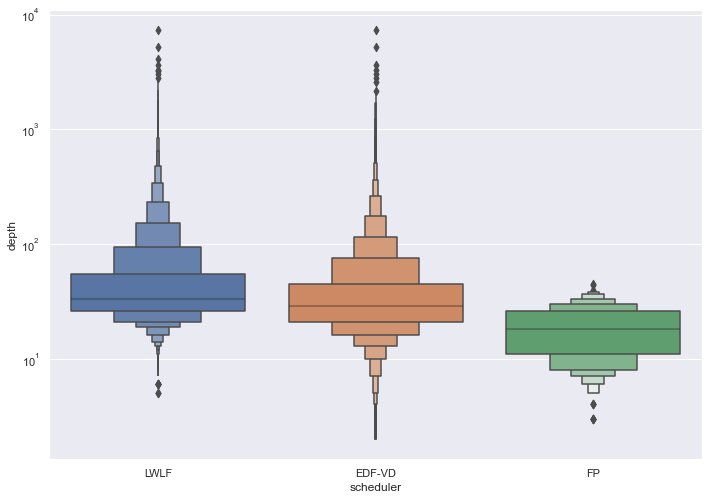

In [11]:
g=sns.boxplot(data=df_sched, x="scheduler", y="depth")
g.set_yscale("log")
plt.show()

g=sns.boxenplot(data=df_sched, x="scheduler", y="depth")
g.set_yscale("log")
plt.show()

In [73]:
i_path = "../task_sched_input.txt"
df_tsk = pd.DataFrame(columns=["tid", "tskid", "O", "T", "D", "X", "C1", "C2"])

with open(i_path) as f:
    t = int(f.readline())
    for tid in range(t):
        n = int(f.readline())
        for tskid in range(n):
            o, t, d, x = list(map(int, f.readline().split(" ")))
            c1, c2 = list(map(int, f.readline().split(" ")))
            df_tsk = df_tsk.append({"tid": tid, "tskid": tskid, "O": o, "T": t, "D": d, "X": x, "C1": c1, "C2": c2}, ignore_index=True)

In [75]:
period_stats = df_tsk.groupby("tid")["D"].agg(["max", np.lcm.reduce])
period_stats = period_stats.rename(columns ={"reduce":"D_lcm", "max":"D_max"})

In [76]:
df_sched_fp_zoom = df_sched[df_sched["tid"] < 1000000]

In [77]:
df_sched_fp_zoom = df_sched_fp_zoom.merge(period_stats, left_on="tid", right_index=True)

In [86]:
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
lims

[1.3953409090909088, 80.69784090909091]

/var/folders/lr/nrx49w_54md3dfrcjb0y_b580000gn/T/ipykernel_51257/1533580990.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot([10,30], [10,30], 'k-', alpha=0.75, color="black")


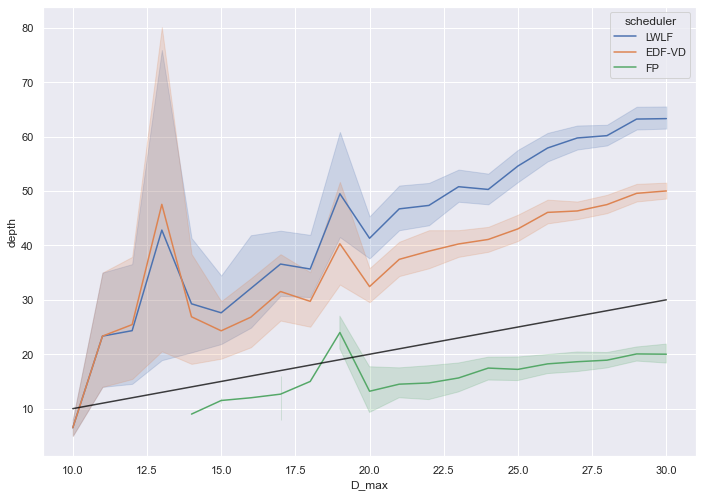

In [87]:
ax = sns.lineplot(data=df_sched_fp_zoom, x="D_max", y="depth", hue="scheduler", estimator="mean")
#ax.plot([10,30], [10,30], 'k-', alpha=0.75, color="black")

/var/folders/lr/nrx49w_54md3dfrcjb0y_b580000gn/T/ipykernel_51257/3672904550.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot([10,30], [10,30], 'k-', alpha=0.75, color="black")


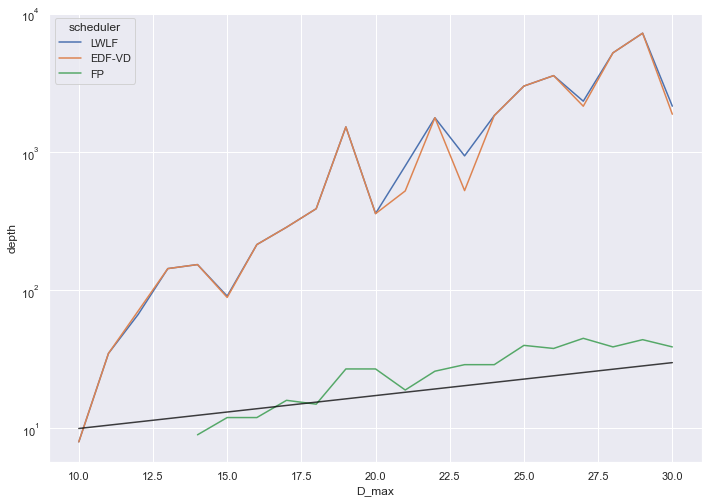

In [90]:
ax = sns.lineplot(data=df_sched_fp_zoom, x="D_max", y="depth", hue="scheduler", estimator="max", ci=None)
#ax.plot([10,30], [10,30], 'k-', alpha=0.75, color="black")
#ax.set_yscale("log")

In [36]:
df_sched.loc[(df_sched['tid'].isin(df.loc[(df['LWLF']==0) & (df['EDF-VD']==1), "ts_id"])) ]

,tid,task_type,search_type,scheduler,schedulable,n_visited,duration,depth,duration_s
1840,920,SPO,ACBF,LWLF,0,134757,3240,29,3.240
1841,920,SPO,ACBF,EDF-VD,1,145590,3538,80,3.538
3454,1727,SPO,ACBF,LWLF,0,49740,1167,28,1.167
3455,1727,SPO,ACBF,EDF-VD,1,41690,967,30,0.967
3528,1764,SPO,ACBF,LWLF,0,166892,3855,27,3.855
...,...,...,...,...,...,...,...,...,...
107,9740,SPO,ACBF,EDF-VD,1,187368,3495,61,3.495
664,19946,SPO,ACBF,LWLF,0,200357,3595,31,3.595
665,19946,SPO,ACBF,EDF-VD,1,160096,2989,47,2.989
300,29794,SPO,ACBF,LWLF,0,88438,1748,86,1.748
